This is the template for the image recognition exercise. <Br>
Some **general instructions**, read these carefully:
 - The final assignment is returned as a clear and understandable *report*
    - define shortly the concepts and explain the phases you use
    - use the Markdown feature of the notebook for larger explanations
 - return your output as a *working* Jupyter notebook
 - name your file as Exercise_MLPR2023_Partx_uuid.jpynb
    - use the uuid code determined below
    - use this same code for each part of the assignment
 - write easily readable code with comments     
     - if you exploit code from web, provide a reference
 - it is ok to discuss with a friend about the assignment. But it is not ok to copy someone's work. Everyone should submit their own implementation
     - in case of identical submissions, both submissions are failed 

**Deadlines:**
- Part 1: Mon 6.2 at 23:59
- Part 2: Mon 20.2 at 23:59
- Part 3: Mon 6.3 at 23:59

**No extensions for the deadlines** <br>
- after each deadline, example results are given, and it is not possible to submit anymore

**If you encounter problems, Google first and if you can’t find an answer, ask for help**
- Moodle area for questions
- pekavir@utu.fi
- teacher available for questions
    - Monday 30.1 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Monday 13.2 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Thursday 2.3 at lecture 10:15-12:00 

**Grading**

The exercise covers a part of the grading in this course. The course exam has 5 questions, 6 points of each. Exercise gives 6 points, i.e. the total score is 36 points.

From the template below, you can see how many exercise points can be acquired from each task. Exam points are given according to the table below: <br>
<br>
7 exercise points: 1 exam point <br>
8 exercise points: 2 exam points <br>
9 exercise points: 3 exam points <br>
10 exercise points: 4 exam points <br>
11 exercise points: 5 exam points <br>
12 exercise points: 6 exam points <br>
<br>
To pass the exercise, you need at least 7 exercise points, and at least 1 exercise point from each Part.
    
Each student will grade one submission from a peer and their own submission. After each Part deadline, example results are given. Study them carefully and perform the grading according to the given instructions. Mean value from the peer grading and self-grading is used for the final points. 

In [297]:
#import uuid
# Run this cell only once and save the code. Use the same id code for each Part.
# Printing random id using uuid1()
#print ("The id code is: ",end="")
#print (uuid.uuid1())

# Part 1

Read the original research article:

İ. Çınar and M. Koklu. Identification of rice varieties using machine learning algorithms. Journal of Agricultural Sciences, 28(2):307–325, 2022. doi: 10.15832/ankutbd.862482.

https://dergipark.org.tr/en/download/article-file/1513632

## Introduction (1 p)

Will be written in Part 3

## Preparations of the data (1 p)

Make three folders in your working folder: "notebooks", "data" and "training_data". Save this notebook in "notebooks" folder.
<br> <br>
Perform preparations for the data
- import all the packages needed for this notebook in one cell 
- import the images. Data can be found from (downloading starts as you press the link) https://www.muratkoklu.com/datasets/vtdhnd09.php <br>
    - save the data folders "Arborio", "Basmati" and "Jasmine" in "data" folder 
- take a random sample of 100 images from Arborio, Basmati and Jasmine rice species (i.e. 300 images in total) 
- determine the contour of each rice (you can use e.g. *findContours* from OpenCV) 
- plot one example image of each rice species, including the contour 

In [298]:
# Imports
import numpy as np
import random
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

In [299]:
# Set seed to random to keep samples same each time
random.seed(522060)

Taking a random sample of 100 images from Arborio, Basmati and Jasmine. Using filepaths to store the samples instead of loading the images into an array.

In [300]:
arborio_filenames = random.sample(os.listdir("../data/Arborio/"), 100)
basmati_filenames = random.sample(os.listdir("../data/Basmati/"), 100)
jasmine_filenames = random.sample(os.listdir("../data/Jasmine/"), 100)

def format_filepaths(datapath, filenames):
    for i in range(len(filenames)):
        filenames[i] = datapath + filenames[i]
    return filenames

arborio_filepaths = format_filepaths("../data/Arborio/", arborio_filenames)
basmati_filepaths = format_filepaths("../data/Basmati/", basmati_filenames)
jasmine_filepaths = format_filepaths("../data/Jasmine/", jasmine_filenames)

# Verify length and correct format
print(len(jasmine_filepaths))
print(jasmine_filepaths[0])

100
../data/Jasmine/Jasmine (6999).jpg


Determining contours for the samples using threshold method. Using CHAIN_APPROX_NONE to save the full contour. Full contour is used to fit an ellipse later.

In [301]:
def determine_contours(paths_to_images):

    contour_arr = []
    for path in paths_to_images:
        image = cv2.imread(path)
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Use threshold = 100 to have one contour which encloses the grain
        thresh = cv2.threshold(image_gray, thresh=100, maxval=255, type=cv2.THRESH_BINARY)[1]
        # Use CHAIN_APPROX_NONE to save full contour 
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        contour_arr.append(contours)

    return contour_arr


arborio_contours = determine_contours(arborio_filepaths)
basmati_contours = determine_contours(basmati_filepaths)
jasmine_contours = determine_contours(jasmine_filepaths)

Drawing contours to the first image of each strain.

In [302]:
arborio_0 = cv2.imread(arborio_filepaths[0])
basmati_0 = cv2.imread(basmati_filepaths[0])
jasmine_0 = cv2.imread(jasmine_filepaths[0])

arborio_0_with_contour = cv2.drawContours(arborio_0, arborio_contours[0], -1, (0, 255, 0), 2)
basmati_0_with_contour = cv2.drawContours(basmati_0, basmati_contours[0], -1, (0, 255, 0), 2)
jasmine_0_with_contour = cv2.drawContours(jasmine_0, jasmine_contours[0], -1, (0, 255, 0), 2)

Plotting the first image of each strain with contours.

Text(0.5, 1.0, 'Jasmine')

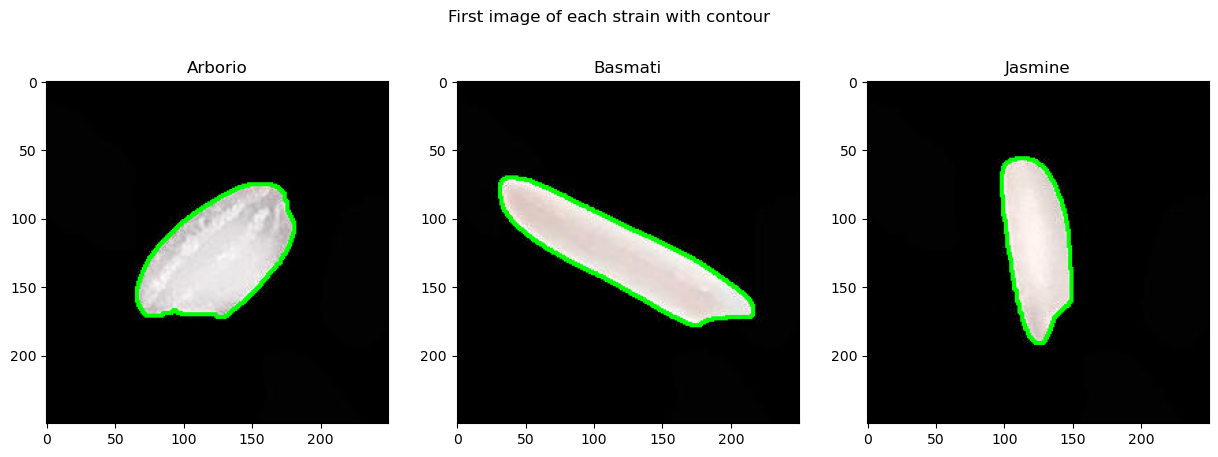

In [303]:
contour_picks, axs = plt.subplots(1,3, figsize=(15, 5))
contour_picks.suptitle("First image of each strain with contour")
axs[0].imshow(arborio_0_with_contour)
axs[0].set_title("Arborio")
axs[1].imshow(basmati_0_with_contour)
axs[1].set_title("Basmati")
axs[2].imshow(jasmine_0_with_contour)
axs[2].set_title("Jasmine")

## Feature extraction (2 p)

Gather the feature data <br>
<br>
Color features (15) <br>
- Calculate the following color features for each image, including only the pixels within the contour (you can use e.g. *pointPolygonTest* from OpenCV)
    - Mean for each RGB color channel 
    - Variance for each RGB color channel 
    - Skewness for each RGB color channel 
    - Kurtosis for each RGB color channel 
    - Entropy for each RGB color channel 
    
Dimension features (6) <br>
- Fit an ellipse to the contour points (you can use e.g. *fitEllipse* from OpenCV) 
- Plot one example image of each rice species including the fitted ellipse 
- Calculate the following features for each image (for details, see the original article)
    - the major axis length the ellipse 
    - the minor axis length of the ellipse 
    - area inside the contour (you can use e.g. *contourArea* from OpenCV) 
    - perimeter of the contour (you can use e.g. *arcLength* from OpenCV) 
    - roundness 
    - aspect ratio 
    
Gather all the features in one array or dataframe: one data point in one row, including all feature values in columns.  <br>
For each data point, include also information of the original image and the label (rice species). Save the data in "training_data" folder. 

#### Getting pixel data inside the contour for each image

In [304]:
def get_pixels_in_contour(image, contour):
    
    pixels = []
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if (cv2.pointPolygonTest(contour, (i,j), measureDist=False) == 1):
                pixels.append(image[i][j])
    return pixels

def get_pixels_for_each_image(paths, contours):

    pixels_for_each_image = []

    for i in range(len(paths)):
        image = cv2.imread(paths[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        pixels = get_pixels_in_contour(image, contours[i][0])
        pixels_for_each_image.append(pixels)
    
    return pixels_for_each_image

arborio_pixels = get_pixels_for_each_image(arborio_filepaths, arborio_contours)
basmati_pixels = get_pixels_for_each_image(basmati_filepaths, basmati_contours)
jasmine_pixels = get_pixels_for_each_image(jasmine_filepaths, jasmine_contours)

#### Calculating mean for each RGB channel

In [305]:
def calc_means(pixel_arrays):
    means = []
    for arr in pixel_arrays:
        means.append(np.mean(arr, axis=0))
    return means

arborio_rgb_means = np.array(calc_means(arborio_pixels))
basmati_rgb_means = np.array(calc_means(basmati_pixels))
jasmine_rgb_means = np.array(calc_means(jasmine_pixels))

In [306]:
# Combine the means
r_mean = np.array([arborio_rgb_means[:,0], basmati_rgb_means[:,0], jasmine_rgb_means[:,0]]).flatten()
g_mean = np.array([arborio_rgb_means[:,1], basmati_rgb_means[:,1], jasmine_rgb_means[:,1]]).flatten()
b_mean = np.array([arborio_rgb_means[:,2], basmati_rgb_means[:,2], jasmine_rgb_means[:,2]]).flatten()

### Creating the dataframe

In [307]:
labels_a = np.full((100), 'Arborio')
labels_b = np.full((100), 'Basmati')
labels_j = np.full((100), 'Jasmine')
labels = np.array([labels_a, labels_b, labels_j]).flatten()

filepaths = np.array([arborio_filepaths, basmati_filepaths, jasmine_filepaths]).flatten()

feature_frame = pd.DataFrame({'label':labels, 'img_filepath':filepaths, 'r_mean': r_mean, 'g_mean': g_mean, 'b_mean': b_mean})
feature_frame

,label,img_filepath,r_mean,g_mean,b_mean
0,Arborio,../data/Arborio/Arborio (14523).jpg,198.879675,196.905803,201.421342
1,Arborio,../data/Arborio/Arborio (2412).jpg,157.374440,157.247102,157.976974
2,Arborio,../data/Arborio/Arborio (4896).jpg,209.500988,209.924920,214.982959
3,Arborio,../data/Arborio/Arborio (3295).jpg,198.458586,199.157742,203.140596
4,Arborio,../data/Arborio/Arborio (9383).jpg,134.992726,135.018912,136.308303
...,...,...,...,...,...
295,Jasmine,../data/Jasmine/Jasmine (5412).jpg,109.769058,110.127803,112.546270
296,Jasmine,../data/Jasmine/Jasmine (8261).jpg,76.722822,81.729954,86.298188
297,Jasmine,../data/Jasmine/Jasmine (11294).jpg,148.246506,149.854162,156.028965
298,Jasmine,../data/Jasmine/Jasmine (10231).jpg,109.127951,109.472724,113.267407


### Calculating variance for each RGB color channel

In [308]:
# Combine pixel data
pixel_data = []
pixel_data.extend(arborio_pixels)
pixel_data.extend(basmati_pixels)
pixel_data.extend(jasmine_pixels)

def calc_rgb_var(pix_data):
    variance_r = []
    variance_g = []
    variance_b = []
    
    for pix in pix_data:
        pix = np.array(pix)
        variance_r.append(np.var(pix[:,0]))
        variance_g.append(np.var(pix[:,1]))
        variance_b.append(np.var(pix[:,2]))

    return variance_r, variance_g, variance_b

variance_r, variance_g, variance_b = calc_rgb_var(pixel_data)

feature_frame['variance_r'] = variance_r
feature_frame['variance_g'] = variance_g
feature_frame['variance_b'] = variance_b

### Calculating skewness for each RGB channel

In [309]:
def calc_rgb_skew(pix_data):
    skew_r = []
    skew_g = []
    skew_b = []
    
    for pix in pix_data:
        pix = np.array(pix)
        skew_r.append(sp.stats.skew(pix[:,0]))
        skew_g.append(sp.stats.skew(pix[:,1]))
        skew_b.append(sp.stats.skew(pix[:,2]))

    return skew_r, skew_g, skew_b

skew_r, skew_g, skew_b = calc_rgb_skew(pixel_data)
feature_frame['skew_r'] = skew_r
feature_frame['skew_g'] = skew_g
feature_frame['skew_b'] = skew_b

### Calculating kurtosis for each RGB channel

In [310]:
def calc_rgb_kurtosis(pix_data):
    kurtosis_r = []
    kurtosis_g = []
    kurtosis_b = []
    
    for pix in pix_data:
        pix = np.array(pix)
        kurtosis_r.append(sp.stats.kurtosis(pix[:,0], fisher=False))
        kurtosis_g.append(sp.stats.kurtosis(pix[:,1], fisher=False))
        kurtosis_b.append(sp.stats.kurtosis(pix[:,2], fisher=False))

    return kurtosis_r, kurtosis_g, kurtosis_b

kurtosis_r, kurtosis_g, kurtosis_b = calc_rgb_kurtosis(pixel_data)
feature_frame['kurtosis_r'] = kurtosis_r
feature_frame['kurtosis_g'] = kurtosis_g
feature_frame['kurtosis_b'] = kurtosis_b

### Calculating entropy for each RGB channel

In [311]:
def calc_rgb_entropy(pix_data):
    entropy_r = []
    entropy_g = []
    entropy_b = []
    
    for pix in pix_data:
        pix = np.array(pix)
        entropy_r.append(sp.stats.entropy(pix[:,0]))
        entropy_g.append(sp.stats.entropy(pix[:,1]))
        entropy_b.append(sp.stats.entropy(pix[:,2]))

    return entropy_r, entropy_g, entropy_b

entropy_r, entropy_g, entropy_b = calc_rgb_entropy(pixel_data)
feature_frame['entropy_r'] = entropy_r
feature_frame['entropy_g'] = entropy_g
feature_frame['entropy_b'] = entropy_b

#### Fitting an ellipse to the contour points

In [312]:
# Combine contour data
contour_data = []
contour_data.extend(arborio_contours)
contour_data.extend(basmati_contours)
contour_data.extend(jasmine_contours)

def fit_ellipse_to_contour(contours):
    ellipses = []
    for cont in contours:
        ellipses.append(cv2.fitEllipse(cont[0]))
    return ellipses

ellipses = fit_ellipse_to_contour(contour_data)

#### Plotting one example image of each rice species including the fitted ellipse

Text(0.5, 1.0, 'Jasmine')

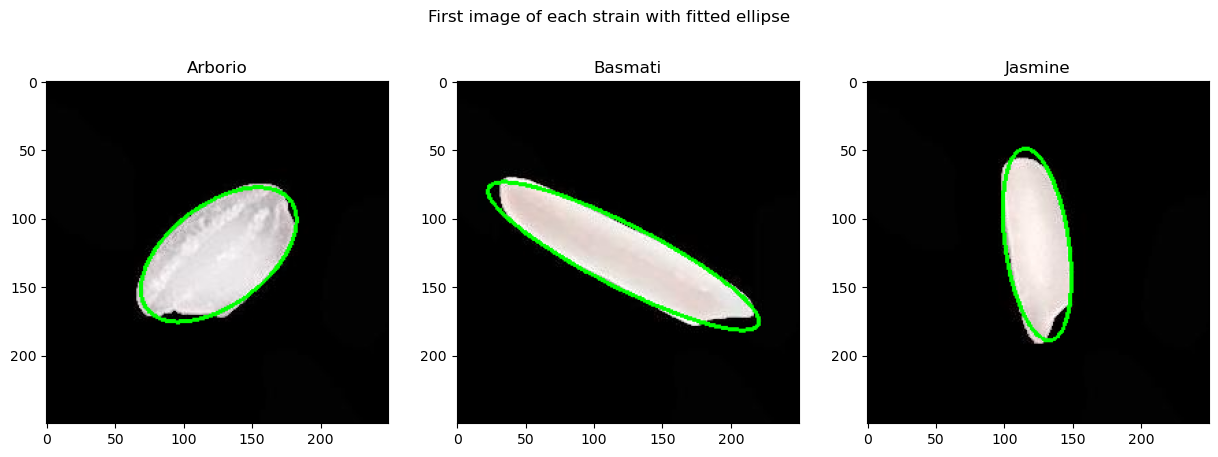

In [313]:
arborio_0_ell = cv2.imread(arborio_filepaths[0])
basmati_0_ell = cv2.imread(basmati_filepaths[0])
jasmine_0_ell = cv2.imread(jasmine_filepaths[0])

arborio_0_ell = cv2.ellipse(arborio_0_ell, ellipses[0], (0, 255, 0), 2)
basmati_0_ell = cv2.ellipse(basmati_0_ell, ellipses[100], (0, 255, 0), 2)
jasmine_0_ell = cv2.ellipse(jasmine_0_ell, ellipses[200], (0, 255, 0), 2)

ellipse_picks, axs_ell = plt.subplots(1,3, figsize=(15, 5))
ellipse_picks.suptitle("First image of each strain with fitted ellipse")
axs_ell[0].imshow(arborio_0_ell)
axs_ell[0].set_title("Arborio")
axs_ell[1].imshow(basmati_0_ell)
axs_ell[1].set_title("Basmati")
axs_ell[2].imshow(jasmine_0_ell)
axs_ell[2].set_title("Jasmine")

#### Calculating the major and minor axis lengths of the ellipse

It seems that the major and minor axes are in the second tuple in the returned values from ```fitEllipse```.

In [314]:
ellipses[100]

((121.23898315429688, 127.51558685302734),
 (45.363338470458984, 221.0970458984375),
 117.48424530029297)

In [315]:
def get_ellipse_axes(ellipses):
    major_axes = []
    minor_axes = []

    for ell in ellipses:
        major_axes.append(ell[1][1])
        minor_axes.append(ell[1][0])

    return major_axes, minor_axes

major_axes, minor_axes = get_ellipse_axes(ellipses)
feature_frame['major_axis'] = major_axes
feature_frame['minor_axis'] = minor_axes

#### Calculating the area inside the contour

In [316]:
def get_contour_areas(contours):
    areas = []
    for cont in contours:
        areas.append(cv2.contourArea(cont[0]))

    return areas

areas = get_contour_areas(contour_data)
feature_frame['area'] = areas

#### Calculating the perimeter of the contour

In [317]:
def get_contour_perimeters(contours):
    perimeters = []
    for cont in contours:
        perimeters.append(cv2.arcLength(cont[0], closed=True))

    return perimeters

perimeters = get_contour_perimeters(contour_data)
feature_frame['perimeter'] = perimeters

#### Calculating the roundness

Using the definition: (4 * pi * area) / (perimeter ^ 2)

Source: https://en.wikipedia.org/wiki/Roundness

In [318]:
feature_frame['roundness'] = (4 * np.pi * feature_frame['area']) / feature_frame['perimeter']**2

#### Calculating the aspect ratio

Using the aspect ratio of the ellipse which is the ratio of the major and minor axis.

Source: https://en.wikipedia.org/wiki/Aspect_ratio

In [319]:
feature_frame['aspect_ratio'] = feature_frame['major_axis'] / feature_frame['minor_axis']
feature_frame

,label,img_filepath,r_mean,g_mean,b_mean,variance_r,variance_g,variance_b,skew_r,skew_g,...,kurtosis_b,entropy_r,entropy_g,entropy_b,major_axis,minor_axis,area,perimeter,roundness,aspect_ratio
0,Arborio,../data/Arborio/Arborio (14523).jpg,198.879675,196.905803,201.421342,4354.307992,4296.288294,4418.168730,-2.456893,-2.451208,...,7.622401,8.793568,8.792274,8.794848,131.244583,73.152748,7418.5,351.747255,0.753468,1.794117
1,Arborio,../data/Arborio/Arborio (2412).jpg,157.374440,157.247102,157.976974,9916.469438,9904.075704,9946.867805,-0.898881,-0.897902,...,1.892503,8.444077,8.444002,8.446075,123.214539,70.410469,6614.0,330.249781,0.762060,1.749946
2,Arborio,../data/Arborio/Arborio (4896).jpg,209.500988,209.924920,214.982959,2564.207025,2589.852847,2593.593189,-3.256448,-3.223498,...,14.112400,8.948197,8.948123,8.950944,139.923599,76.259506,8249.5,366.717817,0.770856,1.834835
3,Arborio,../data/Arborio/Arborio (3295).jpg,198.458586,199.157742,203.140596,5283.947573,5325.040799,5417.774746,-2.232906,-2.229303,...,6.249075,8.813550,8.813552,8.818234,133.478455,74.399918,7731.0,354.676187,0.772292,1.794067
4,Arborio,../data/Arborio/Arborio (9383).jpg,134.992726,135.018912,136.308303,12601.409862,12592.765869,12787.393423,-0.334419,-0.334294,...,1.166045,8.578857,8.580113,8.582468,154.186676,76.704918,9112.0,395.421354,0.732324,2.010128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Jasmine,../data/Jasmine/Jasmine (5412).jpg,109.769058,110.127803,112.546270,10106.815602,10180.694021,10546.060741,-0.139083,-0.138388,...,1.047397,7.903715,7.903183,7.911385,149.601166,44.445732,5048.5,341.261974,0.544749,3.365929
296,Jasmine,../data/Jasmine/Jasmine (8261).jpg,76.722822,81.729954,86.298188,10060.239672,11404.706373,12555.904338,0.555451,0.554564,...,1.313512,7.566975,7.567529,7.584094,150.579865,46.265419,5344.5,341.923880,0.574458,3.254696
297,Jasmine,../data/Jasmine/Jasmine (11294).jpg,148.246506,149.854162,156.028965,8282.238809,8453.606846,9115.858387,-0.954921,-0.953349,...,1.959138,8.195801,8.196726,8.200123,148.319336,45.983921,5077.0,339.989895,0.551931,3.225461
298,Jasmine,../data/Jasmine/Jasmine (10231).jpg,109.127951,109.472724,113.267407,13531.675952,13632.481750,14381.546823,0.163089,0.163527,...,1.046265,7.780927,7.779912,7.794195,144.899750,47.707474,5190.5,340.350286,0.563076,3.037255


#### Save data in csv

In [320]:
feature_frame.to_csv('../training_data/rice_data.csv', index=False)